# Customer Analytics - Transactional Dataset for Customer Analytics

The idea of this notebook is to perform customer analytics on the transactional dataset created after data cleaning, and find answers to meaningful customer-related questions.

- Start importing the necessary libraries, which are `pandas` and `matplotlib`:

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import warnings as wn

wn.filterwarnings('ignore')

- Next, import the `customer_dataset` created at the previous cleaning step, and print the first five rows:

In [8]:
path = 'PATH'

In [9]:
customer_df = pd.read_csv(path)

In [10]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


- Next, check the shape of the dataframe, to see how large is it:


In [11]:
customer_df.shape

(406828, 5)

- Next, let's check the type of each column:

In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406828 entries, 0 to 406827
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406828 non-null  int64  
 1   InvoiceNo    406828 non-null  int64  
 2   AmountSpent  406828 non-null  float64
 3   InvoiceDate  406828 non-null  object 
 4   Country      406828 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.5+ MB


- As one can see, some columns are as objects, so let's convert them into the proper type:

In [13]:
# convert InvoiceDate
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

# convert Country
customer_df['Country'] = customer_df['Country'].astype(str)

Now, to begin the analysis, let's check how unique values are in each label. For that, let's use the Pandas `nunique()` method:

In [14]:
customer_df.nunique()

CustomerID      4372
InvoiceNo      22189
AmountSpent     3027
InvoiceDate    20460
Country           37
dtype: int64

As can be seen, the dataset contains 4372 unique customers from 37 different countries.

Even though there are 400,000+ recorded transactions, there're only 22,189 unique invoice numbers. Thus, one can conclude that the invoice number is not unique to each transaction.

Now, let's check the number of unique customers per country. We can use Pandas `groupby()` method:

In [15]:
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


Next, let's assign this dataframe, rename the column, and sort it based on the number of unique customers per country, and check the first five rows\:

In [16]:
# assign
country_df = customer_df.groupby(['Country'])[['CustomerID']].nunique()

# rename colum
country_df.columns = ['no_of_customers']

# sort dataframe based on column
country_df = country_df.sort_values(by=['no_of_customers'], ascending=False)

In [17]:
country_df.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


Another possibility to check is through graphical visualizations. Thus, let's check the dataframe with a bar plot from Pandas:

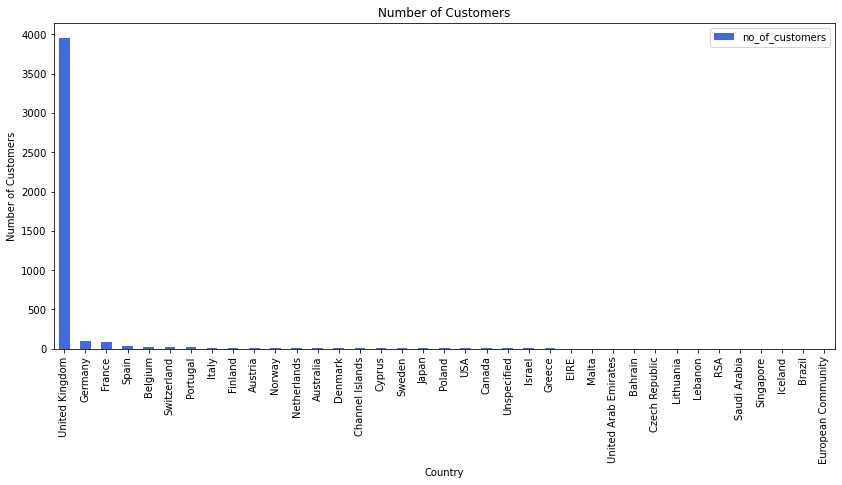

In [18]:
country_df.plot(kind='bar', color='royalblue', figsize=(14,6))
plt.ylabel('Number of Customers')
plt.title('Number of Customers');

With this plot, one can clearly see the distribution of clients per country.

As a next step, let's generate insights using the *four methods of analytics*, which are:

- **Descriptive Analytics**: describe the plot stating that most customers of the online retail store are from UK. Also, one can conclude that most of the customers of this retail store are based in Europe in comparison to other continents.
- **Diagnostic Analytics**: diagnose that the cause for the large number of customers coming in from Europe is because the online retail store must have heavily marketed itself in Europe rather than the other continents.
- **Predictive Analytics**: predict that the online retail store will continue getting more customers from the UK since there's already a massive number of customers based in the UK.
- **Prescriptive Analytics**: one can prescribe the online retail store to further invest in marketing in the UK since the number of conversions are very good over there.

Now, let's move on to understand how the customers are generating revenue for the online retail store.

In order to do that, one can calculate the total amount of transaction per month. So let's extract the year and month information from `InvoiceDate` and store it into another column called `InvoiceYearMonth`:

In [19]:
customer_df['InvoiceYearMonth'] = customer_df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

In [20]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,InvoiceYearMonth
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom,2010-12
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom,2010-12
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12


Now, it's possible to calculate the revenue per month per year applying Pandas `groupby()` method, as follows:

In [21]:
revenue_df = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

In [22]:
revenue_df.head()

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871


Next, let's plot the values to see the trend of the revenue per month:

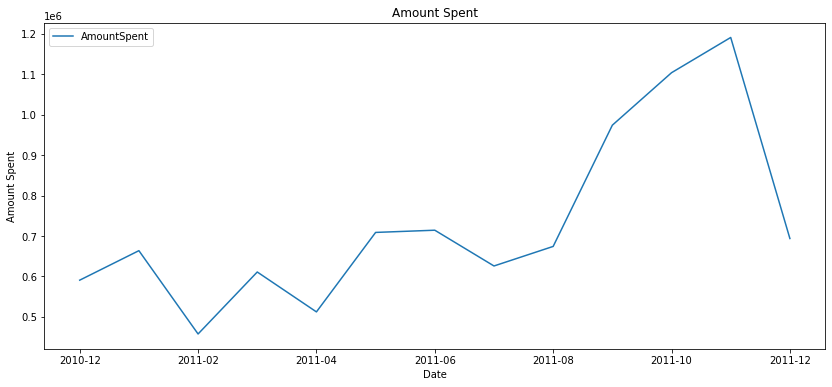

In [23]:
revenue_df.plot(kind='line', figsize=(14,6))
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.title('Amount Spent');

One can notice that the revenues drop significantly in December of 2011. Now, one can ask if the store is losing customers?

We can find the date and time at which the last data point was collected using Pandas `max()` method of the `InvoiceDate` column:

In [24]:
customer_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

So, this early stop on data collection was the cause for the downward fall of sales in December.

Next, let's move towards the customers and find how many monthly active customers were present in each month:

In [25]:
monthly_active_df = customer_df.groupby(['InvoiceYearMonth'])[['CustomerID']].nunique()

monthly_active_df.columns = ['no_of_unique_customers']

monthly_active_df.head()

,no_of_unique_customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899


Now, let's visualize through a bar plot:

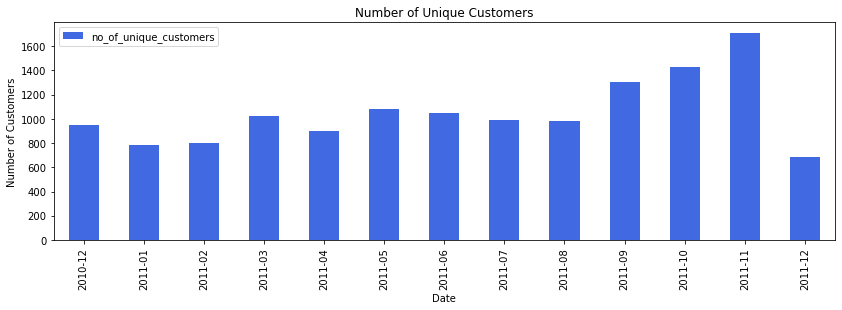

In [26]:
monthly_active_df.plot(kind='bar', color='royalblue', figsize=(14,4))
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.title('Number of Unique Customers');

One can clearly see the similar trend between the number of active customers and the revenue drop in December of 2011. So, we can suggest that the growth of active customers may be the cause behind the growth in total revenue generated per month per year, which is an interesting ingisht.